# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [3]:
#install spacy in the current conda environment
!pip install spacy


In [4]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------------ --------------------------- 3.9/12.8 MB 21.3 MB/s eta 0:00:01
     -------------------------- ------------- 8.4/12.8 MB 20.8 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 20.7 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 18.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

In [8]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [9]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [10]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \r\nMatter \r\nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [11]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [12]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [13]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [14]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [15]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [16]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [17]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

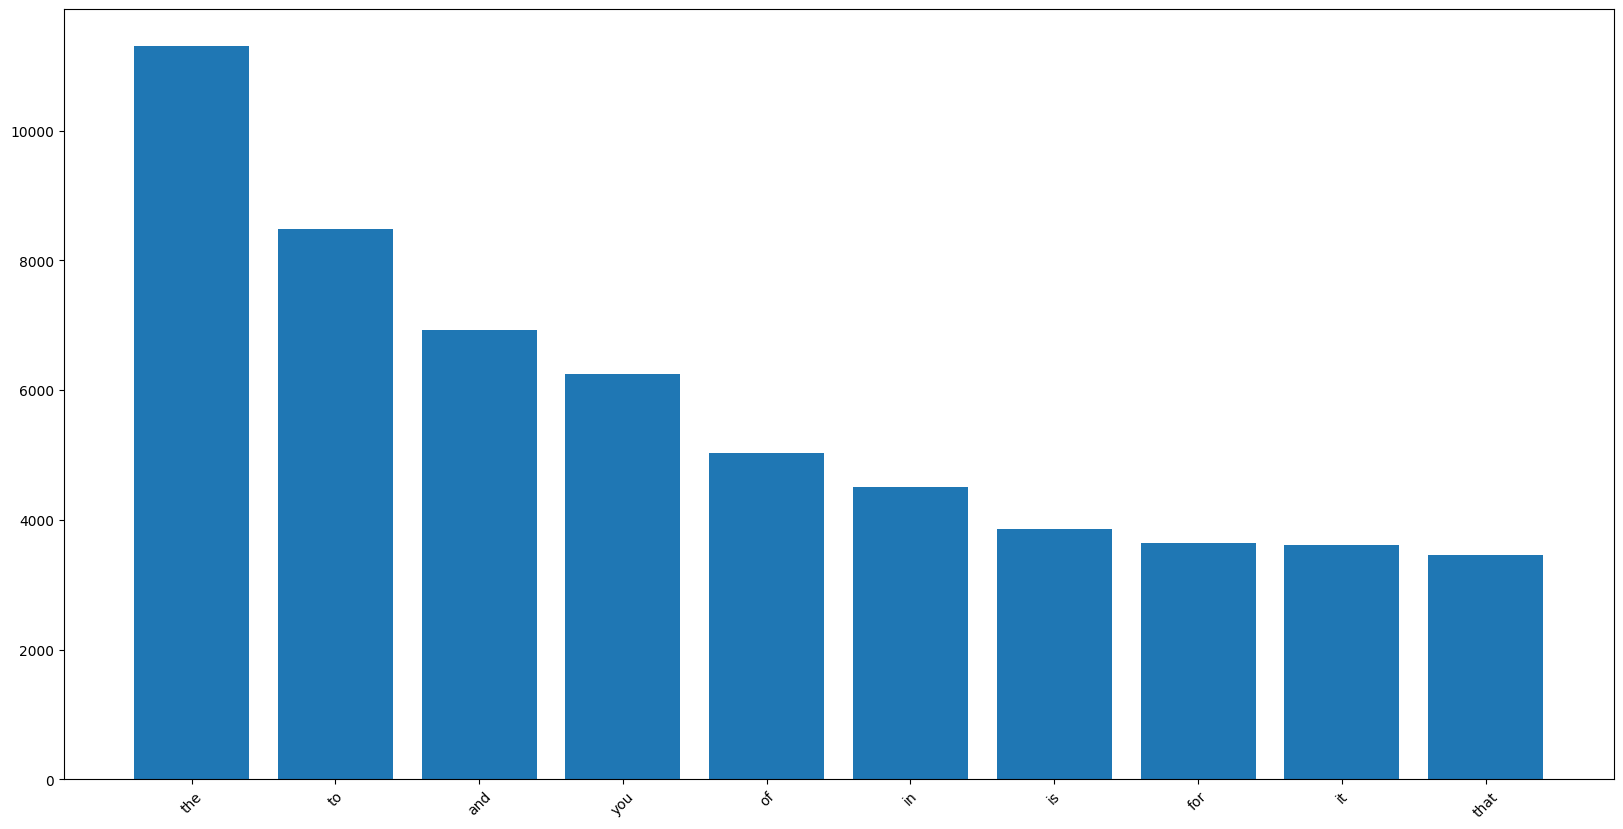

In [19]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: These words are stop words, they are not very useful for studying the unique aspects or themes of a community because they do not provide specific insights into the content. They are typically filtered out to focus on more meaningful and content-specific words that better reflect the unique characteristics, concerns, and topics prevalent within a community.

#### Lemmatization and stopword removal

In [20]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [21]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [22]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [23]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8637 sparse matrix of type '<class 'numpy.int64'>'
	with 126833 stored elements in Compressed Sparse Row format>

In [24]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not               2862
student           1183
like              1183
people            1124
class              988
                  ... 
sell minnesota       3
cred                 3
credential           3
sell oregon          3
pay dollar           3
Length: 8637, dtype: int64

In [25]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

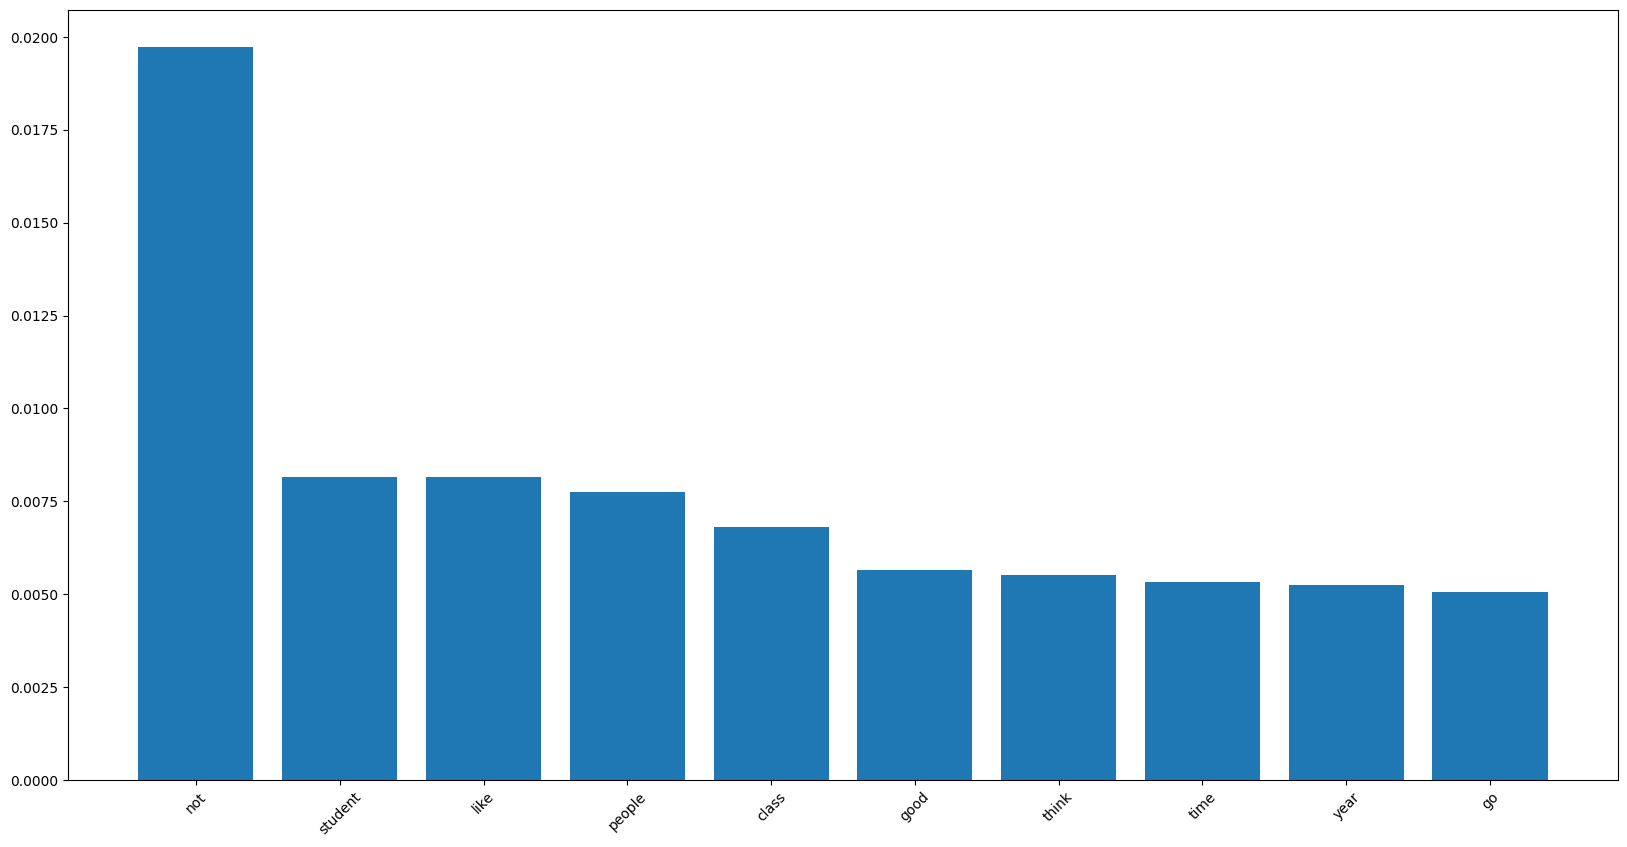

In [26]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [27]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.138501862325838e-05

In [28]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000034
cs                  0.001228
computer            0.000262
dtype: float64

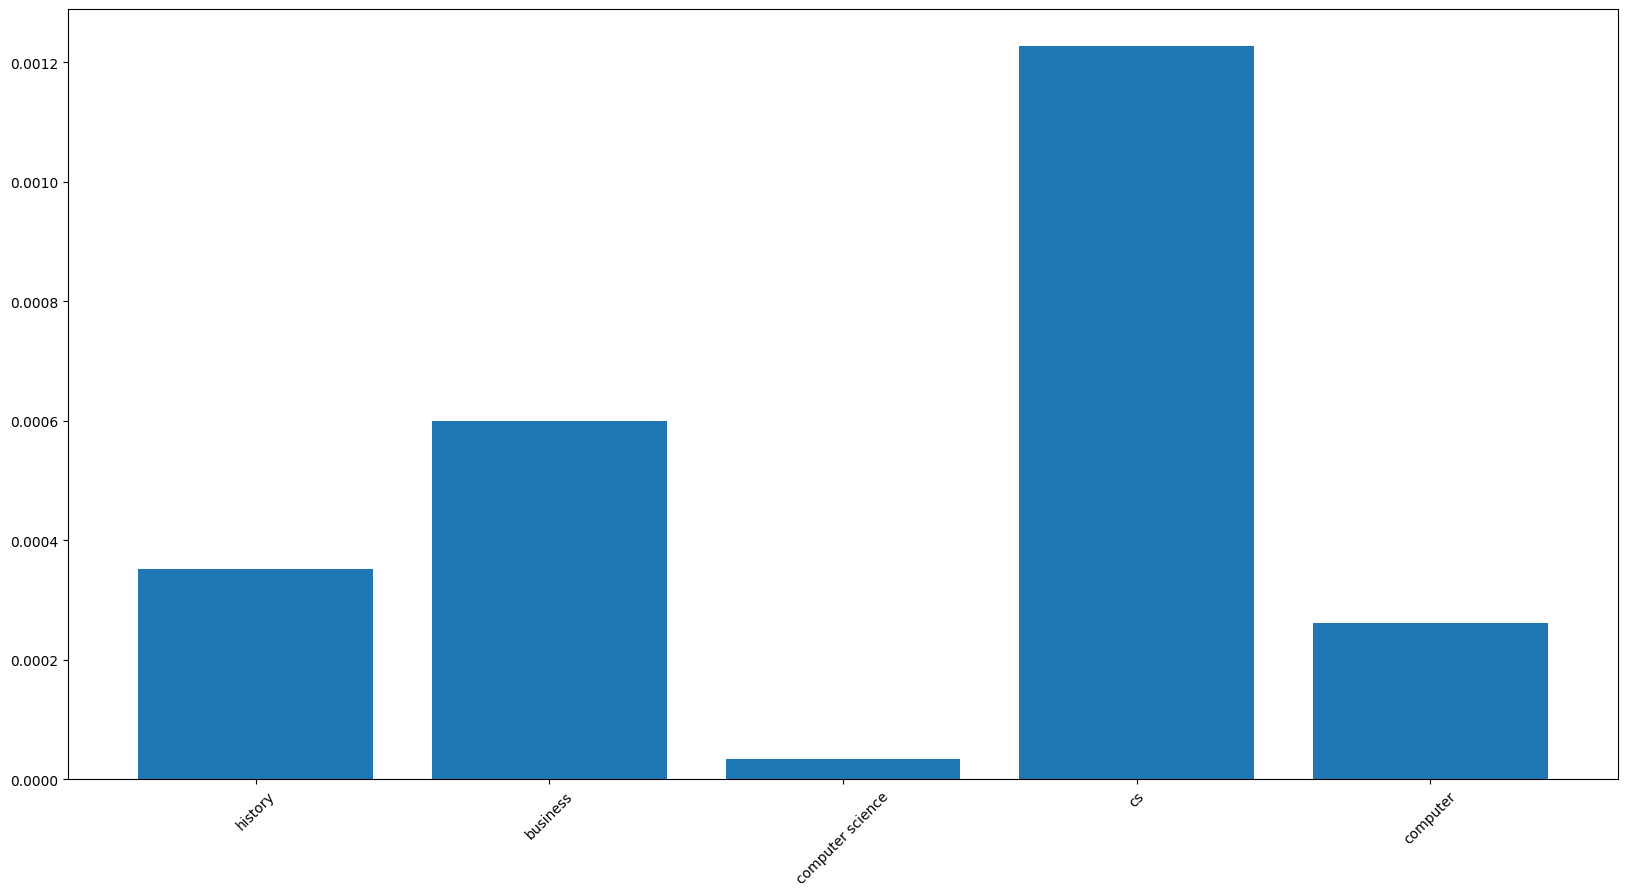

In [29]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [30]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

In [31]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["go", "people", "class", "time", "year"]]
plot_list

go        0.005070
people    0.007753
class     0.006815
time      0.005339
year      0.005249
dtype: float64

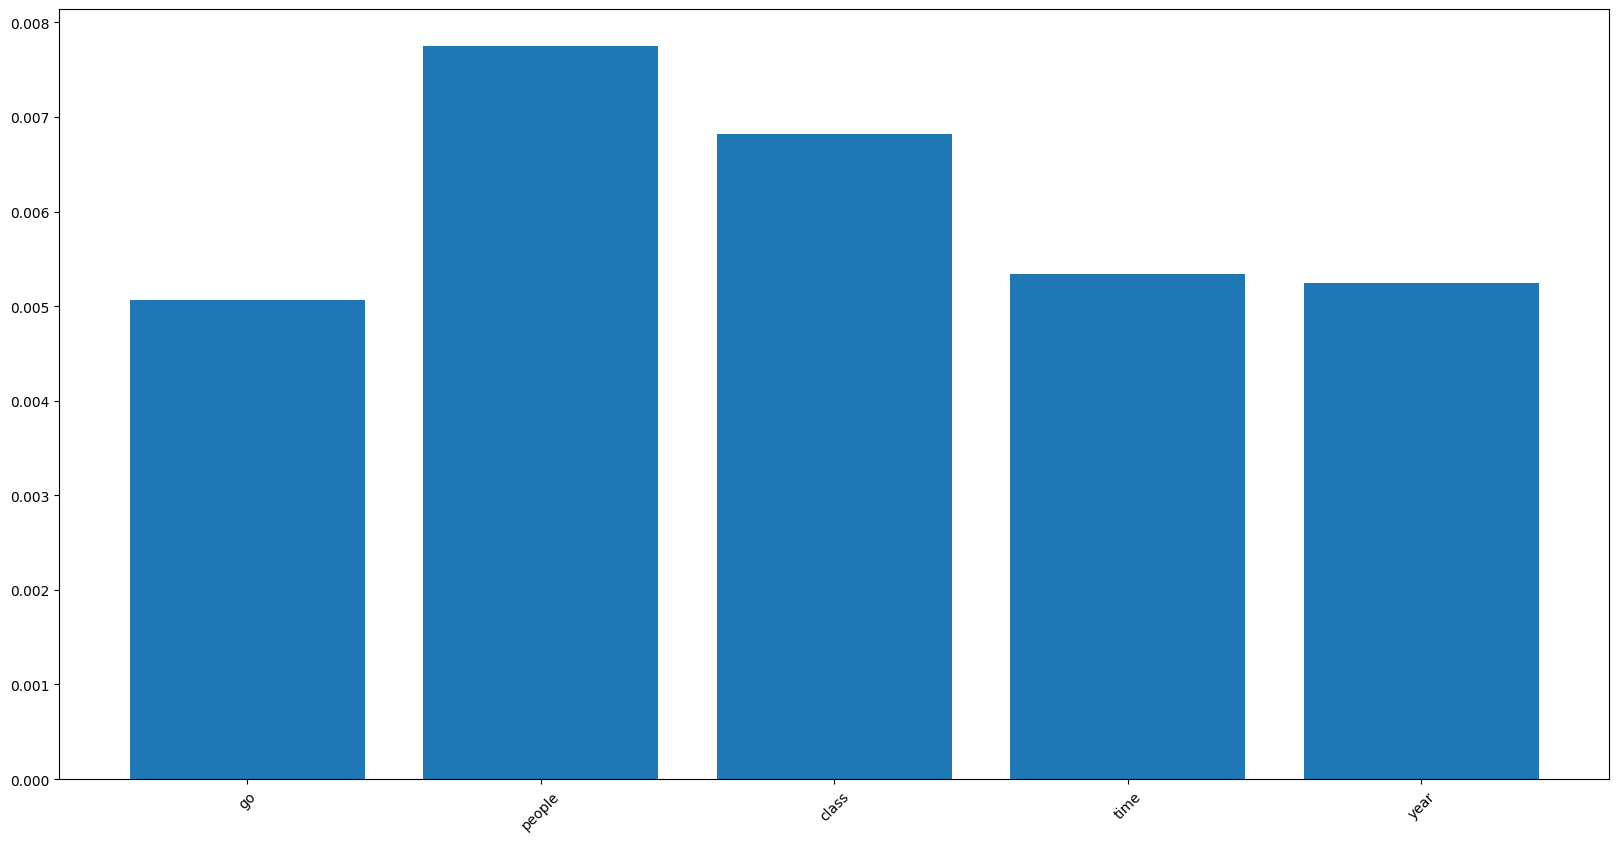

In [32]:
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [33]:
uiuc=pd.read_csv("uiuc.csv")


In [34]:
uiuc['cleaned']=uiuc['text'].apply(clean)
uiuc['lemmatized']=uiuc['cleaned'].apply(lemmatize)

In [35]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(uiuc['lemmatized'])

In [36]:
bag_of_words

<4725x3891 sparse matrix of type '<class 'numpy.int64'>'
	with 49429 stored elements in Compressed Sparse Row format>

In [37]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

#count the word frequency in illinois subreddit
words_counts_uiuc = bow_df.sum()
words_counts_uiuc = words_counts_uiuc.sort_values(ascending=False)

In [38]:
word_counts = words_counts_uiuc / words_counts_uiuc.sum()

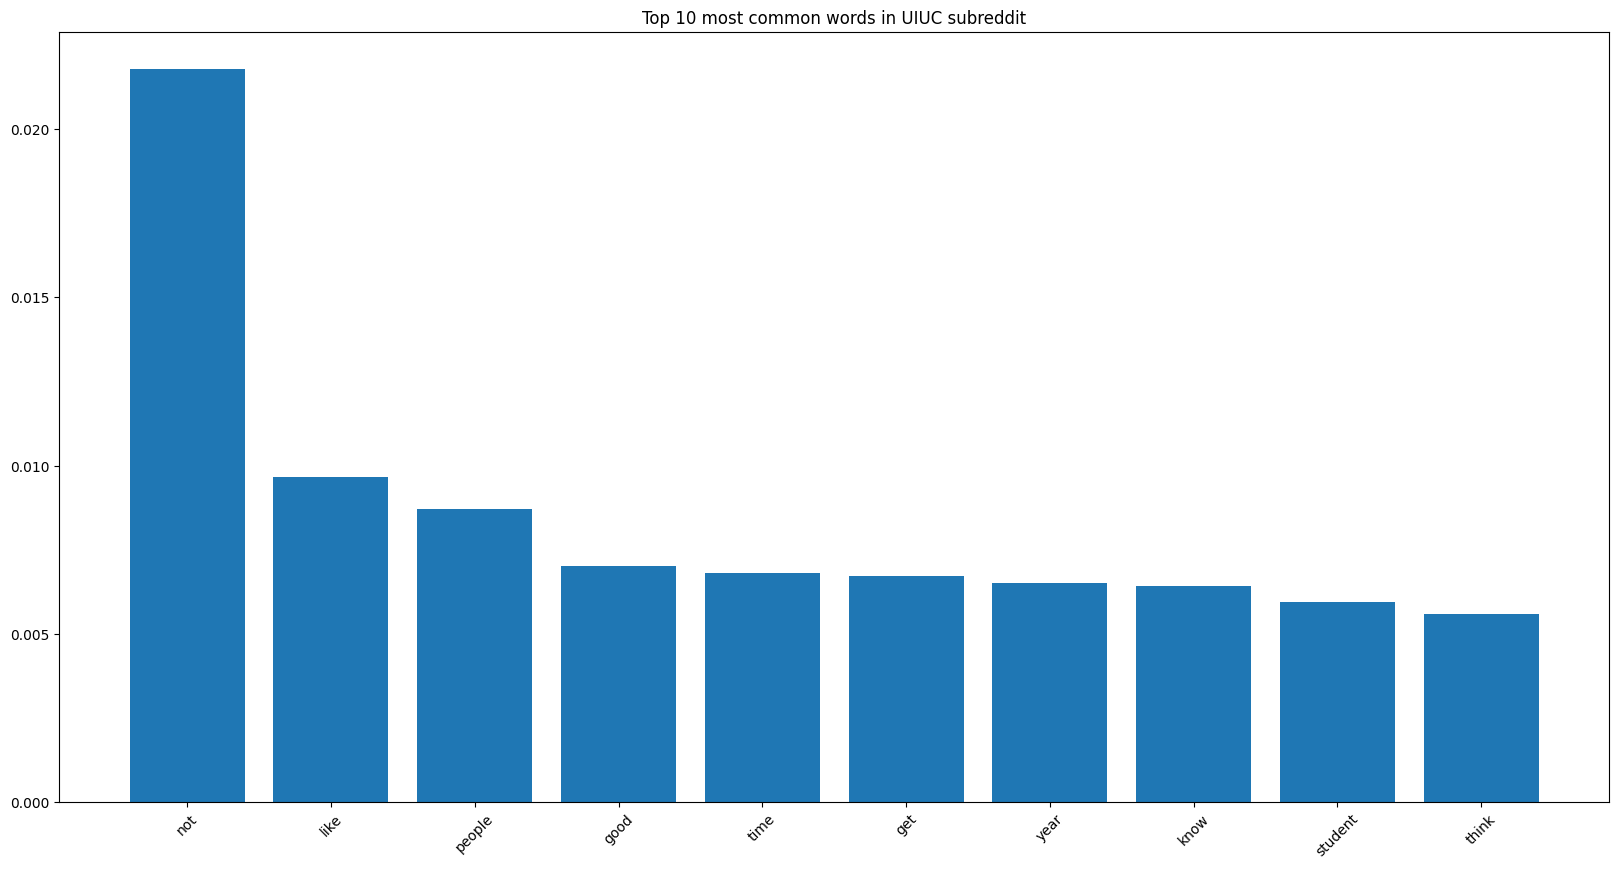

In [39]:
top_10_words_uiuc = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(top_10_words_uiuc.index, top_10_words_uiuc.values) 
plt.xticks(rotation=45) 
plt.title("Top 10 most common words in UIUC subreddit")
plt.show()

In [40]:
word_counts["people"]

0.008703991893163477

In [41]:
plot_list_uiuc=word_counts[["go", "people", "class", "time", "year"]]
plot_list_uiuc

go        0.005519
people    0.008704
class     0.005483
time      0.006804
year      0.006514
dtype: float64

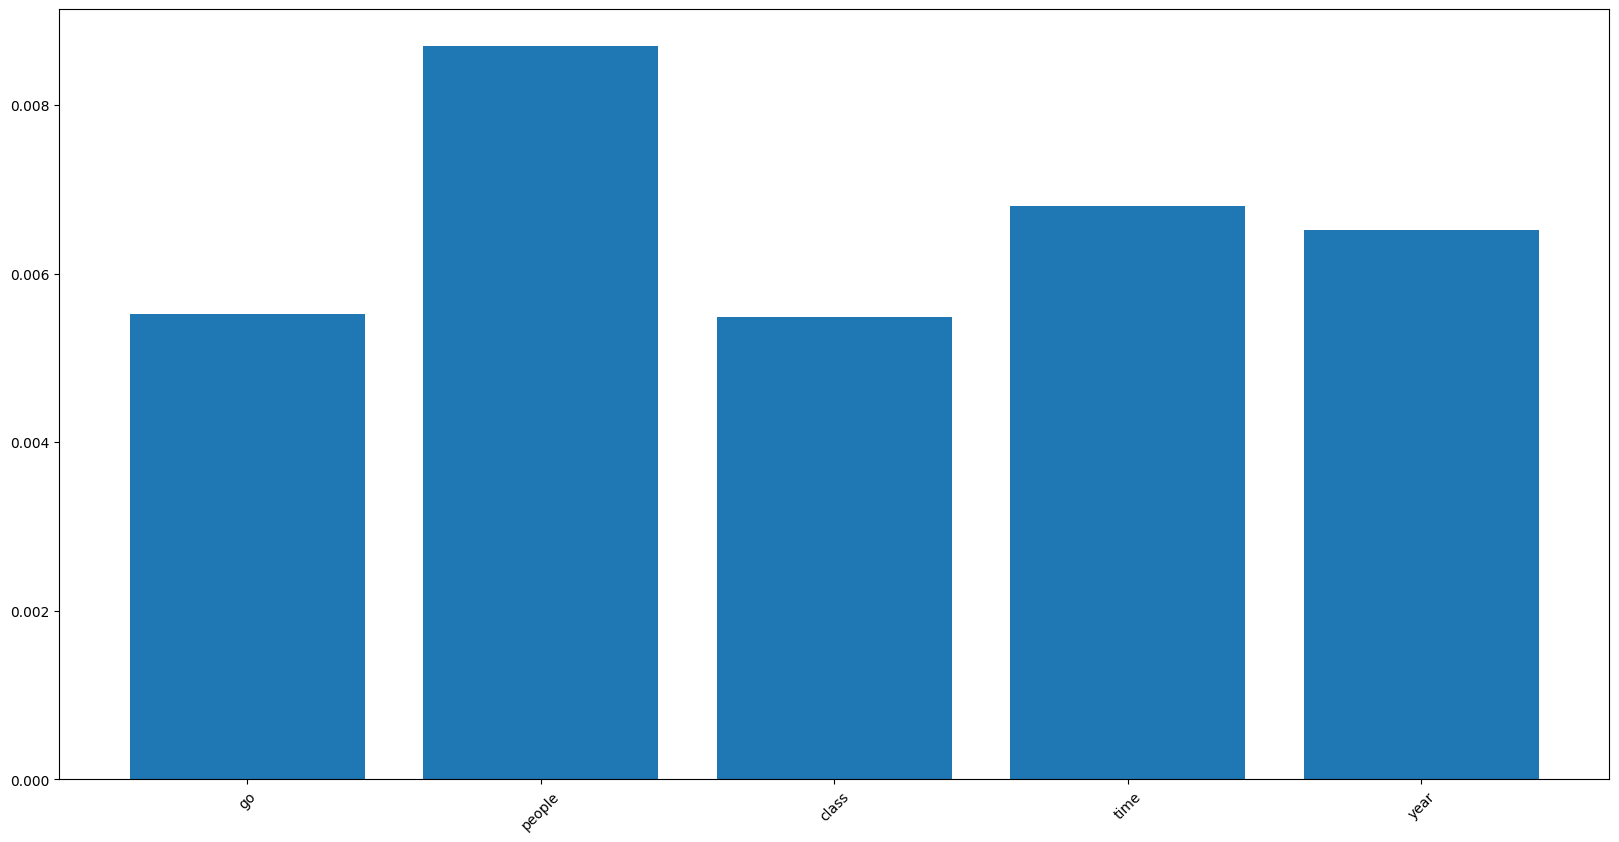

In [42]:
plt.figure(figsize=(20,10))
plt.bar(plot_list_uiuc.index, plot_list_uiuc.values)    
plt.xticks(rotation=45)
plt.show()

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [44]:
#clean and lemmatize the data csv
data['cleaned_text']=data['text'].apply(clean)  
data['lemmatized_text']=data['cleaned_text'].apply(lemmatize)

In [45]:
#create a bag of words representation with count vectorizer
bag_of_words = vectorizer.fit_transform(data['lemmatized_text'])

In [46]:
#train a logistic regression model using the bag of words features as X and the label column as y
x_train, x_test, y_train, y_test = train_test_split(bag_of_words, data['label'], test_size=0.2, random_state=42)

#train a logisitc regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [47]:
#report the accuracy of the model

accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ", accuracy)

accuracy:  0.7291005291005291


#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [48]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 

#The models accuracy is 71% which is better than the previous model. The accuracy has increased because the model is now trained on the data from both subreddits. This allows the model to learn the differences between the two subreddits and make better predictions. 



#### Part 3: Examine the top features of your model using the following code

In [49]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?
# what i notice about these words is that they are similar to the words that were most common in the dataset. This is expected because the model is trying to learn the differences between the two subreddits, so it makes sense that the most common words in each subreddit would be the most important features for the model.

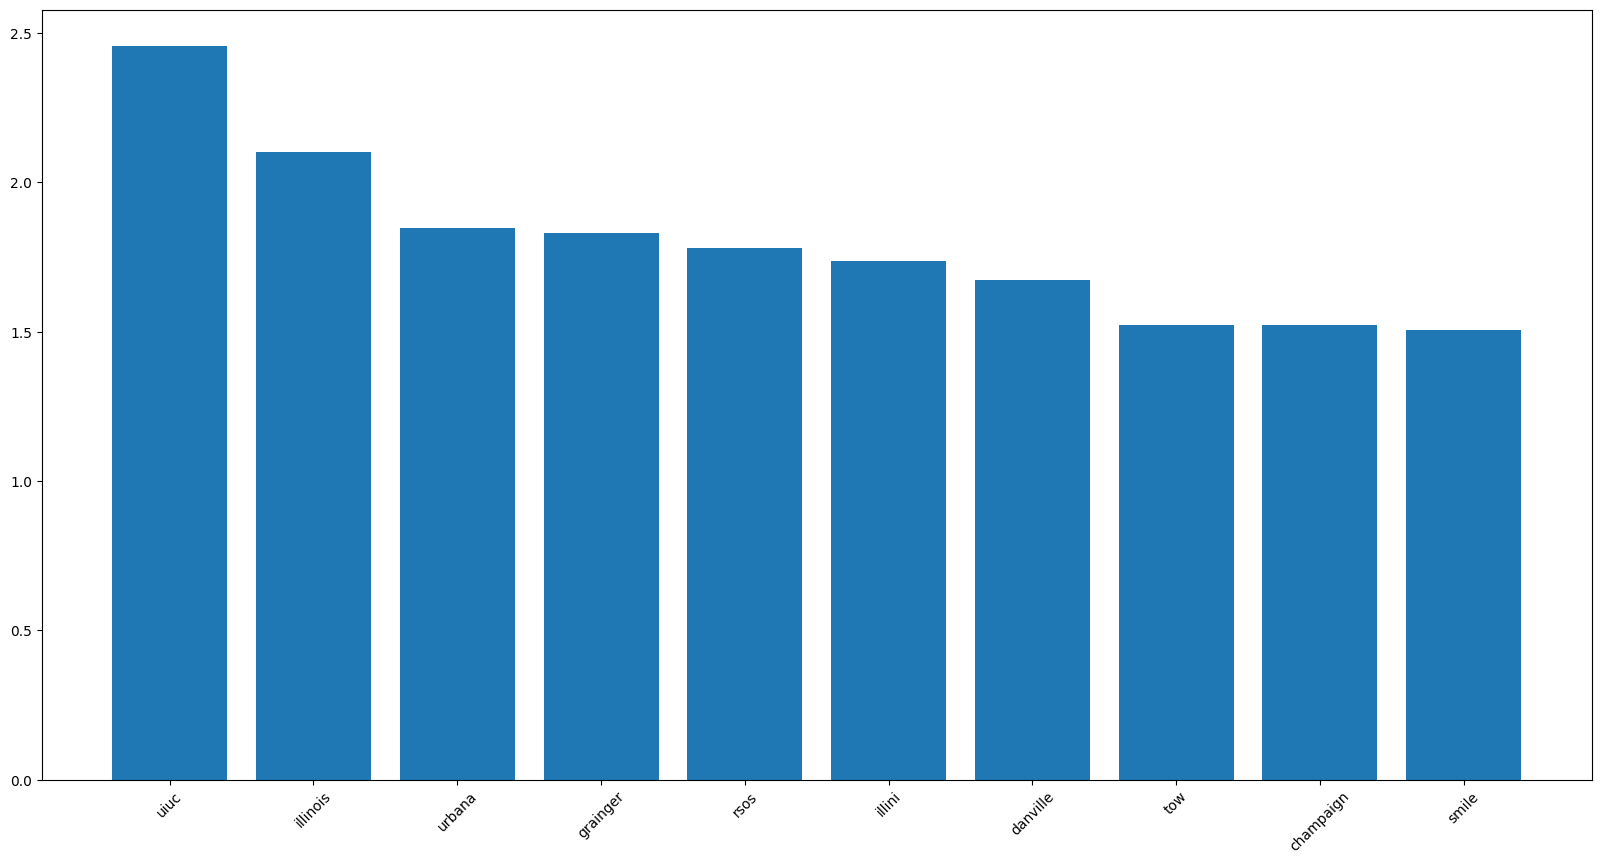

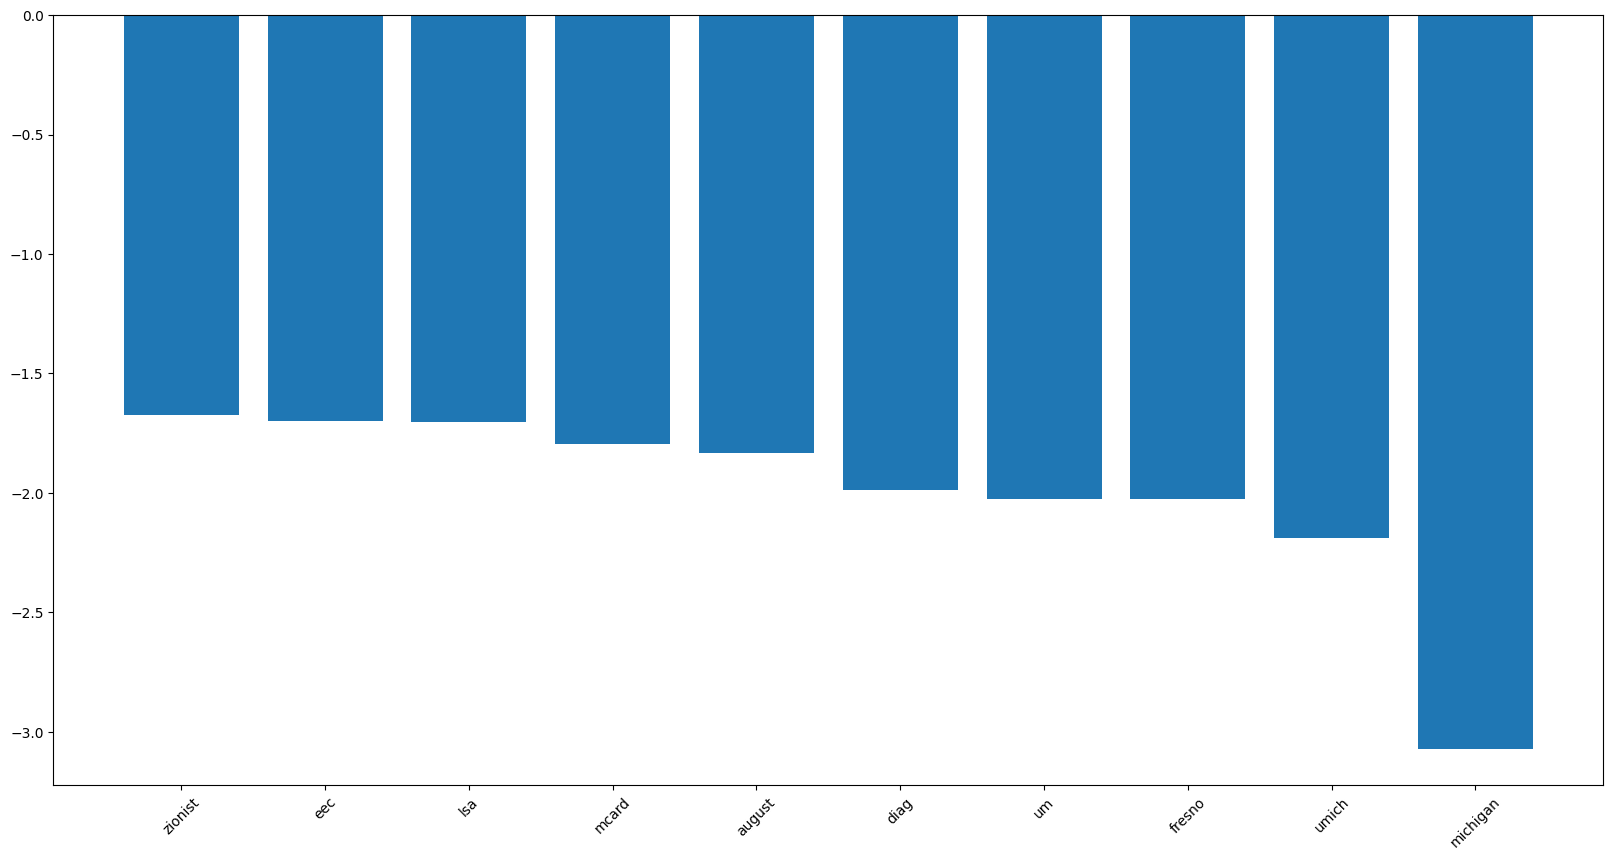

In [50]:
coefficients = pd.DataFrame({'feature': vectorizer.get_feature_names_out(), 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)

#plot the top 10 positive and negitive features 
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

plt.figure(figsize=(20,10))
plt.bar(top_10_positive['feature'], top_10_positive['coefficient'])
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,10))
plt.bar(top_10_negative['feature'], top_10_negative['coefficient'])
plt.xticks(rotation=45)
plt.show()




In [51]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?
# yes, the words that differentiate UIUC from another university are words like "uiuc", "illinois", "champaign", "urbana", "illini" which are specific to UIUC.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [56]:
!pip install gensim

In [57]:
#train lda topic model with genism
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

In [58]:
uiuc["cleaned_text"] = uiuc['text'].apply(clean)

In [62]:
ldax = vectorizer.fit_transform(uiuc['cleaned_text'])

In [60]:
corpus = Sparse2Corpus(ldax, documents_columns=False)

In [63]:
# Step 3: create a dictionary from the vectorizer's vocabulary
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [66]:
corpus

In [67]:
# Train the LDA model
Lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=20)

# Show the topics
Lda_model.show_topics()

[(10,
  '0.020*"in" + 0.020*"that" + 0.017*"is" + 0.010*"there" + 0.010*"my" + 0.010*"of" + 0.009*"for" + 0.009*"so" + 0.008*"they" + 0.008*"have"'),
 (6,
  '0.020*"is" + 0.016*"of" + 0.014*"it" + 0.010*"if" + 0.010*"not" + 0.009*"are" + 0.008*"this" + 0.008*"in" + 0.008*"from" + 0.007*"that"'),
 (1,
  '0.022*"if" + 0.021*"in" + 0.012*"youre" + 0.011*"im" + 0.011*"iclicker" + 0.010*"if youre" + 0.010*"interested" + 0.010*"be" + 0.008*"selling" + 0.007*"of"'),
 (17,
  '0.020*"it" + 0.011*"of" + 0.010*"in" + 0.009*"him" + 0.008*"dont" + 0.008*"class" + 0.007*"as" + 0.007*"is" + 0.007*"if" + 0.007*"will"'),
 (18,
  '0.018*"it" + 0.014*"is" + 0.013*"but" + 0.012*"not" + 0.011*"if" + 0.010*"im" + 0.010*"my" + 0.010*"on" + 0.009*"that" + 0.008*"so"'),
 (12,
  '0.015*"of" + 0.008*"be" + 0.007*"year" + 0.007*"dudes" + 0.007*"benefits" + 0.007*"with" + 0.006*"my" + 0.006*"they" + 0.006*"on" + 0.006*"but"'),
 (16,
  '0.022*"for" + 0.015*"on" + 0.011*"idea" + 0.009*"is" + 0.009*"half" + 0.008*"th

In [68]:
# Evaulate topic distribution or a review from bag of words
# Print long string without having to scroll
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=uiuc['cleaned_text'][30]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

pmd


In [69]:
# Check the topic distribution of a single review
Lda_model.get_document_topics(corpus[30])

[(0, 0.05),
 (1, 0.05),
 (2, 0.05),
 (3, 0.05),
 (4, 0.05),
 (5, 0.05),
 (6, 0.05),
 (7, 0.05),
 (8, 0.05),
 (9, 0.05),
 (10, 0.05),
 (11, 0.05),
 (12, 0.05),
 (13, 0.05),
 (14, 0.05),
 (15, 0.05),
 (16, 0.05),
 (17, 0.05),
 (18, 0.05),
 (19, 0.05)]

In [70]:
models=Lda_model.get_document_topics(corpus, minimum_probability=0.0)

In [72]:
rows = []
for i in range(len(models)):
    row = []
    for m in models[i]:
        row.append(m[1])
    rows.append(row)

topic_df = pd.DataFrame(rows)

In [73]:
topic_df.sort_values(3, ascending=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
864,0.000736,0.000736,0.000736,0.986016,0.000736,0.000736,0.000736,0.000736,0.000736,0.000736,0.000736,0.000736,0.000736,0.000736,0.000736,0.000736,0.000736,0.000736,0.000736,0.000736
1567,0.000747,0.000747,0.000747,0.985802,0.000747,0.000747,0.000747,0.000747,0.000747,0.000747,0.000747,0.000747,0.000747,0.000747,0.000747,0.000747,0.000747,0.000747,0.000747,0.000747
71,0.001220,0.001220,0.001220,0.976811,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220,0.001220
51,0.001282,0.001282,0.001282,0.975633,0.001282,0.001282,0.001282,0.001282,0.001282,0.001282,0.001282,0.001282,0.001282,0.001282,0.001282,0.001282,0.001282,0.001282,0.001282,0.001282
327,0.001430,0.001430,0.001430,0.972824,0.001430,0.001430,0.001430,0.001430,0.001430,0.001430,0.001430,0.001430,0.001430,0.001430,0.001430,0.001430,0.001430,0.001430,0.001430,0.001430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,0.013149,0.000154,0.014348,0.000154,0.223851,0.020620,0.015170,0.076608,0.100227,0.000154,0.023303,0.000154,0.000154,0.437610,0.000154,0.000154,0.000154,0.024717,0.006234,0.042929
4129,0.000149,0.000149,0.016864,0.000149,0.356821,0.060007,0.039912,0.061678,0.021513,0.005937,0.020103,0.020451,0.011709,0.345264,0.000149,0.010703,0.005829,0.000149,0.000149,0.022318
1010,0.007288,0.000134,0.006100,0.000134,0.390229,0.000134,0.309386,0.000134,0.023833,0.000134,0.010244,0.006413,0.000134,0.214975,0.000134,0.011766,0.000134,0.000134,0.018421,0.000134
243,0.016653,0.000132,0.023168,0.000132,0.333060,0.088953,0.026127,0.000132,0.000132,0.025613,0.037485,0.039150,0.000132,0.256646,0.095491,0.027549,0.000132,0.023874,0.000132,0.005310


In [74]:
# Evaluate topic distribution of a review from bag of words
# Print long string without having to scroll
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=uiuc['cleaned_text'][70]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

im a freshman and i noticed it too on my first day moving in everyone seemed
sort of cold and like i was bothering them it made me stressed out on my first
day a lot of the student employees are kind but the older ones seem to be just
plain rude


In [ ]:
# I think the theme of this topic is related to the university's campus and the student life more importantly freshman who are new to the campus. Maybe the data they were trying to get from this was asking freshman how thier expierance was on thier first week of college.